# Ranking Vortex as Initial Condition for Navier Stokes


In [72]:
using ViscousFlow

In [73]:
using Plots

In [74]:
my_params = Dict()

Dict{Any, Any}()

In [75]:
my_params["Re"] = 200

200

In [76]:
xlim = (-2.0,2.0)
ylim = (-2.0,2.0)
my_params["grid Re"] = 4.0

4.0

In [77]:
g = setup_grid(xlim,ylim,my_params)

PhysicalGrid{2}((210, 202), (105, 101), 0.02, ((-2.08, 2.08), (-2.0, 2.0)), 16)

In [78]:
sys = viscousflow_system(g,phys_params=my_params);

## A basic example: the Lamb-Oseen vortex
This example starts with a single vortex with a Gaussian distribution of vorticity. To generate this, will use the `SpatialGaussian` function:
The command below creates a Gaussian with radius σ at (0,0) with strength 1.

In [79]:
σ = 0.2
x0 = 0.0
y0 = 0.0
A = 1
#gauss = SpatialGaussian(σ,σ,x0,y0,A)
f(x,y) = sqrt(x^2+y^2)<=σ ? A/(π*σ^2) : 0
field = SpatialField(f);

In [80]:
u0 = init_sol(field,sys)

(Dual nodes in a (nx = 210, ny = 202) cell grid of type Float64 data
  Number of Dual nodes: (nx = 210, ny = 202), Float64[])

In [81]:
tspan = (0.0,10.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Dual nodes in a (nx = 210, ny = 202) cell grid of type Float64 data
  Number of Dual nodes: (nx = 210, ny = 202), Float64[])

In [82]:
step!(integrator,1.0)

In [83]:
integrator

t: 1.0000000000000007
u: (Dual nodes in a (nx = 210, ny = 202) cell grid of type Float64 data
  Number of Dual nodes: (nx = 210, ny = 202), Float64[])

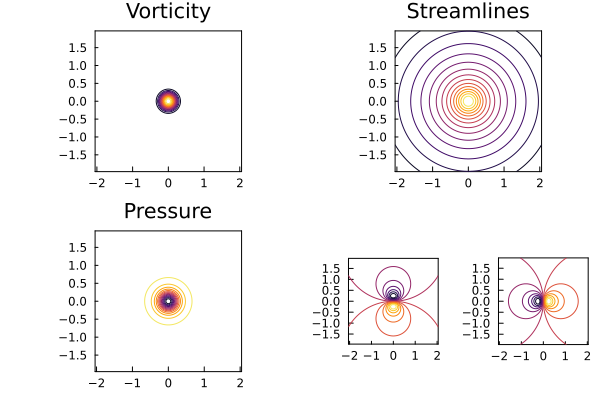

In [84]:
plot(
plot(vorticity(integrator),sys,title="Vorticity"),
plot(streamfunction(integrator),sys,title="Streamlines"),
plot(pressure(integrator),sys,title="Pressure"),
plot(velocity(integrator),sys))

In [85]:
oseen_exact(t) = SpatialGaussian(sqrt(σ^2+4*t/my_params["Re"]),sqrt(σ^2+4*t/my_params["Re"]),x0,y0,A)
exactsol(t) = init_sol(oseen_exact(t),sys)

exactsol (generic function with 1 method)

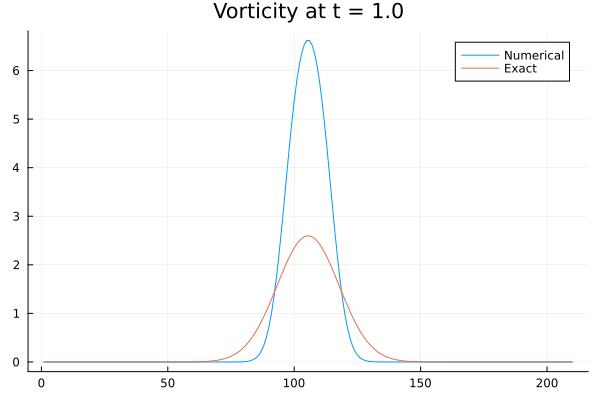

In [86]:
plot(vorticity(integrator)[:,104],label="Numerical")
plot!(vorticity(exactsol(integrator.t),sys,integrator.t)[:,104],label="Exact")
plot!(title=string("Vorticity at t = ",round(integrator.t,digits=2)))

## Second example: co-rotating vortices

In [87]:
σ = 0.1
x01, y01 = 0.5, 0.0
x02, y02 = -0.5, 0.0
A = 1
twogauss = SpatialGaussian(σ,σ,x01,y01,A) + SpatialGaussian(σ,σ,x02,y02,A)

AddedFields:
  SpatialGaussian{false, 0}([0.010000000000000002 0.0; 0.0 0.010000000000000002], [99.99999999999999 -0.0; -0.0 99.99999999999999], [0.5, 0.0], 1.0, 15.915494309189533, [0.0, 0.0])
  SpatialGaussian{false, 0}([0.010000000000000002 0.0; 0.0 0.010000000000000002], [99.99999999999999 -0.0; -0.0 99.99999999999999], [-0.5, 0.0], 1.0, 15.915494309189533, [0.0, 0.0])


In [88]:
f1(x,y) = sqrt((x-x01)^2+(y-y01)^2)<=σ ? A/(π*σ^2) : 0
f2(x,y) = sqrt((x-x02)^2+(y-y02)^2)<=σ ? A/(π*σ^2) : 0
field = SpatialField(f1) + SpatialField(f2);

In [89]:
#u0 = init_sol(twogauss,sys)
u0 = init_sol(field,sys)

(Dual nodes in a (nx = 210, ny = 202) cell grid of type Float64 data
  Number of Dual nodes: (nx = 210, ny = 202), Float64[])

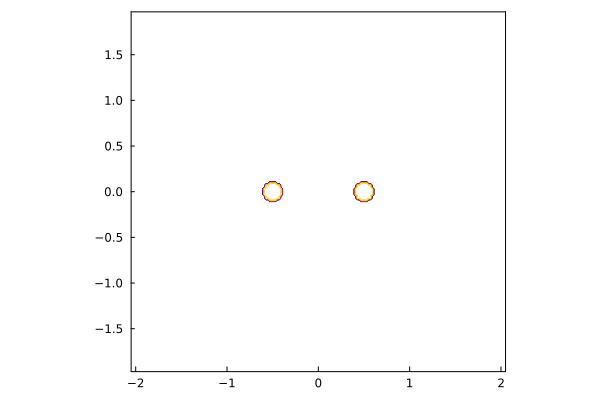

In [90]:
plot(vorticity(u0,sys,0.0),sys)

In [91]:
tspan = (0.0,8.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Dual nodes in a (nx = 210, ny = 202) cell grid of type Float64 data
  Number of Dual nodes: (nx = 210, ny = 202), Float64[])

In [92]:
step!(integrator,8.0)

In [93]:
sol = integrator.sol;

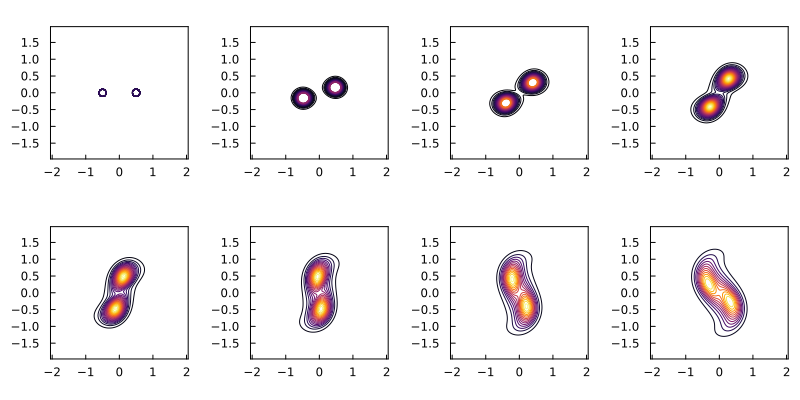

In [94]:
plt = plot(layout = (2,4), size = (800, 400), legend=:false)
tsnap = 0.0:1.0:7.0
for (i, t) in enumerate(tsnap)
    plot!(plt[i],vorticity(sol,sys,t),sys,levels=range(0.1,5,length=31))
end
savefig(plt,"CoRotating.pdf")
plt

# It can be seen that the Rankine vortex's vorticity is much more concentrated at its center compared to the Gaussian vortex. But other than that, the evolutions of the vortex and the two co-rotating vortices look similar qualitatively.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*